# Execute the code below

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link)

# Multivariate linear regression with Scikit-Learn

The equation of an univariate linear regresion is a line : aX +b

The equation of a multivariate linear regression with 2 variables is a plan : aW + bX + c

The equation of a multivariate linear regression with n variables is a hyperplan : a1 X1 + a2 X2 + .... + an Xn + b


## Let's start with 2 variables
With Plotly express, show a [3D scatterplot ](https://plotly.com/python/plotly-express/#3d-coordinates)with :
- X-axis : MAX temperature
- Y-axis : MIN temperature
- Z-axis : Sunhours


In [3]:
# Complete x, y and z in the script below:
fig = px.scatter_3d(x = 'MAX_TEMPERATURE_C' , 
              y = 'MIN_TEMPERATURE_C', 
              z= 'SUNHOUR', 
              data_frame=df_weather)

fig.show()

Is it hard to read the 3D scatterplot ? You can move it with your mouse.

### Let's predict
You have to predict the MAX temperature from 2 variables :
- MIN temperature
- Sunhours

Hey, it's the reason why X has 2 brackets and is uppercase and y has a simple bracket and is lowercase . It can take multiple variables (X) to predict only one target (y). 

**Remember to save the result of your prediction in a cew column 'predict'.**

In [30]:
# Your code here :
from sklearn.linear_model import LinearRegression

X = df_weather[['MIN_TEMPERATURE_C', 'SUNHOUR']]
y = df_weather['MAX_TEMPERATURE_C']

# fit
model = LinearRegression().fit(X, y)

# quels sont les coefficients?
for i, j in zip(X.columns, model.coef_):
  print(i, j)

print("interception :",model.intercept_)

# predictions
df_weather['predict'] = model.predict(X)

MIN_TEMPERATURE_C 0.9886738269230049
SUNHOUR 0.6622240192647239
interception : 1.6488837312596818


### Let's visualize
With Plotly express, show a 3D scatterplot with :

- X-axis : your new 'predict' column
- Y-axis : MIN temperature
- Z-axis : Sunhours



In [19]:
# Your code here :
fig = px.scatter_3d(x = 'predict' , 
              y = 'MIN_TEMPERATURE_C', 
              z= 'SUNHOUR', 
              data_frame=df_weather)

fig.show()

**Move the cube with your mouse. Hey your 3D-scatterplot has a special shape : it's a plan !**

## Multivariate linear regressions with N-variables
Make a prediction with the maximum number of variables. But beware : 
- variables must be numeric
- your target (MAX temperature) should not be present in variables

Store your prediction in a new column 'predict2'.

In our 3D human vision, we can't represent a hyperplan. But, let's trust in our computer, it can calculate. So trust it and show a simple scatterplot with :
- X-axis : Date
- Y-axis : MAX temperatures in blue dots and 'predict2' in orange dots

Expected result:

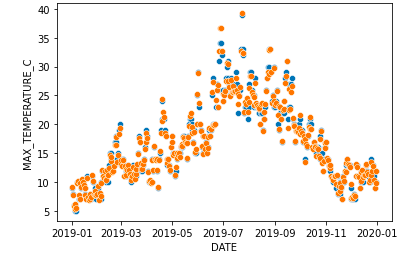

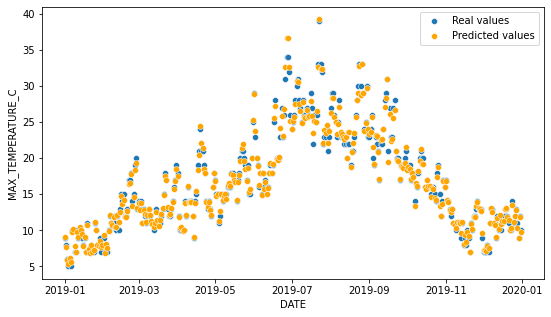

In [32]:
# Your code here :
y = df_weather['MAX_TEMPERATURE_C']
X = df_weather.drop(['MAX_TEMPERATURE_C', 'OPINION', 'predict', 'DATE', 'MONTH', 'DAY', 'WEATHER_CODE_MORNING', 'WEATHER_CODE_NOON', 'WEATHER_CODE_EVENING'], axis = 1)

# fit
model2 = LinearRegression().fit(X, y)

# predictions
df_weather['predict2'] = model2.predict(X)

# scatter 
plt.figure(figsize=(9,5))
df_weather['DATE'] = pd.to_datetime(df_weather['DATE'])
sns.scatterplot(x='DATE', y = 'MAX_TEMPERATURE_C', data=df_weather, label = 'Real values')
sns.scatterplot(x='DATE', y = 'predict2', data=df_weather, color = 'orange', label = 'Predicted values')
plt.show()

You can read coefficient for each column with the attribute `.coef_`. Which column has the biggest coefficient ?

In [33]:
# Your code here :
# quels sont les coefficients?
for i, j in zip(X.columns, model2.coef_):
  print(i, j)

MIN_TEMPERATURE_C 8.782929955198785e-14
WINDSPEED_MAX_KMH -1.1102230246251565e-15
TEMPERATURE_MORNING_C -1.157781906781863e-13
TEMPERATURE_NOON_C 2.6044604944675295e-13
TEMPERATURE_EVENING_C 2.782314702586757e-13
PRECIP_TOTAL_DAY_MM 9.02683660883997e-15
HUMIDITY_MAX_PERCENT -2.4204391038096816e-15
VISIBILITY_AVG_KM 1.2055391586765632e-14
PRESSURE_MAX_MB -2.5942349638851816e-15
CLOUDCOVER_AVG_PERCENT -9.739216989236765e-15
HEATINDEX_MAX_C 8.715019890385767e-13
DEWPOINT_MAX_C -5.611229304858726e-14
WINDTEMP_MAX_C 9.158282247036096e-14
TOTAL_SNOW_MM 5.551115123125783e-17
UV_INDEX -3.519809104646486e-14
SUNHOUR -4.176665011162522e-14
predict2 0.9999999999985085


LA colonne avec le plus gros coefficient est : HEATINDEX